In [7]:
# coding: utf-8
import pandas as pd

In [8]:
# lecture CSV (attention au codage du fichier !)
data = pd.read_csv("datasets/operations_perso.csv",parse_dates=[0,1],sep= ';',decimal= ',', dayfirst=True)

In [15]:
print(data)

    Date opération Date valeur                                   libellé  \
0       2020-02-22  2020-02-22        CARTE 21/02 GRAND FRAIS COIGNIERES   
1       2020-02-22  2020-02-22      CARTE 21/02 AUCHAN MAUREPAS MAUREPAS   
2       2020-02-21  2020-02-21       CARTE 20/02 VB CAVE ET BAR MAUREPAS   
3       2020-02-21  2020-02-21            CARTE 20/02 MCDONALDS MAUREPAS   
4       2020-02-17  2020-02-17                    CARTE 16/02 RATP PARIS   
5       2020-02-17  2020-02-17               CARTE 15/02 SNCF VERSAILLES   
6       2020-02-14  2020-02-14      CARTE 13/02 AUCHAN MAUREPAS MAUREPAS   
7       2020-02-14  2020-02-14        CARTE 13/02 GRAND FRAIS COIGNIERES   
8       2020-02-10  2020-02-10                                  PRLV SFR   
9       2020-02-10  2020-02-10      CARTE 08/02 ACADEMY BEAUGRE MAUREPAS   
10      2020-02-06  2020-02-06      CARTE 05/02 AUCHAN MAUREPAS MAUREPAS   
11      2020-02-06  2020-02-06        CARTE 05/02 GRAND FRAIS COIGNIERES   
12      2020

In [17]:
# renommage column
data.columns = ['date_operation','date_valeur','libelle','debit','credit','rien']

In [18]:
# recherche des mots fréquents
from collections import Counter

def most_common_words(labels):
    words = []
    for lab in labels:
        words += lab.split(" ")
    counter = Counter(words)
    for word in counter.most_common(100):
        print(word)

most_common_words(data['libelle'].values)

('CARTE', 493)
('MAUREPAS', 324)
('AUCHAN', 128)
('COIGNIERES', 93)
('VIR', 88)
('GRAND', 70)
('FRAIS', 70)
('PRLV', 60)
('LE', 42)
('SFR', 38)
('BAR', 36)
('CAVE', 32)
('ET', 32)
('', 29)
('DR', 25)
('POLE', 24)
('EMPLOI', 24)
('IDF', 24)
('ALLOCATAI', 24)
('MCDONALDS', 23)
('MONTIGNY', 23)
('BR', 23)
('PayPal', 22)
('(Europe)', 22)
('S.a.r.l.', 22)
('et', 22)
('VB', 21)
('RET', 21)
('DAB', 21)
('CARBURANT', 20)
('AMAZON', 20)
('FIXE', 17)
('ADSL', 17)
('TRAPPES', 16)
('LA', 14)
('BURGER', 13)
('KING', 13)
('VERTICAL', 12)
('ART', 12)
('DECATHLON', 12)
('+', 12)
('SARL', 11)
('V&B', 11)
('LES', 11)
('PAYMENTS', 11)
('ANDROID', 11)
('PARIS', 10)
('PARIS2441535/', 10)
("VERTICAL'ART", 9)
('MAUREPAS78', 8)
('ELANCOURT', 8)
('EU', 8)
('12/08', 8)
('02/08', 8)
('0818', 8)
('M', 7)
('08/11', 7)
('31/10', 7)
('25/10', 7)
('RAM', 7)
('PRESTATION', 7)
('BOURGES', 7)
('26/06', 7)
('OU', 6)
('MATHON', 6)
('1', 6)
('17/08', 6)
('15/03', 6)
('VERSAILLES', 5)
('D', 5)
('28/01', 5)
('12/12', 5)
('PA

In [32]:
CATEGS = {
    'GRAND FRAIS': 'COURSES FRAIS',
    'AUCHAN': 'COURSES','CARREFOUR': 'COURSES','INTERMARCHE':'COURSES',
    'BAR': 'BAR','VERTICAL': 'BAR','SOCIAL':'BAR',
    'POLE EMPLOI': 'REVENUS',
    'SFR': 'TELEPHONE',
    'CARBURANT': 'TRANSPORT',
    'AMAZON': 'ACHAT',
    'DECATHLON': 'ACHAT',
    'PayPal':'ACHAT',
    'MCDO': 'JUNKFOOD',
    'BURGER KING': 'JUNKFOOD',
    'PLATANE': 'JUNKFOOD',
    'PIZ': 'JUNKFOOD',
    'RET DAB': 'RETRAIT LIQUIDE',
    'RAM' : 'RETOUR SECU'
}
TYPES = {
    'CARTE': 'CARTE',
    'VIR': 'VIREMENT',
    'RET': 'RETRAIT',
    'PRLV': 'PRELEVEMENT',
    'CHQ': 'CHEQUE',
}

In [33]:
EXPENSES = [80,200] # Bornes des catégories de dépense : petite, moyenne et grosse
LAST_BALANCE = 8639.79 # Solde du compte APRES la dernière opération en date
WEEKEND = ["Saturday","Sunday"] # Jours non travaillés

In [34]:
# Controle des colonnes
for c in ['date_operation','libelle','debit','credit']:
    if c not in data.columns:
        if (c in ['debit','credit'] and 'montant' not in data.columns) or \
        (c not in ['debit','credit']):
            msg = "Il vous manque la colonne '{}'. Attention aux majuscules "
            msg += "et minuscules dans le nom des colonnes!"
            raise Exception(msg.format(c))

In [35]:
# Suppression des colonnes innutiles
for c in data.columns:
    if c not in ['date_operation','libelle','debit','credit','montant']:
        del data[c]
        
print(data)

    date_operation                                   libelle  montant
666     2018-02-23        CARTE 22/02 GRAND FRAIS COIGNIERES   -27.67
665     2018-02-28          VIR POLE EMPLOI DR IDF ALLOCATAI  1815.67
663     2018-03-01            VIR remboursement visa algerie   -85.00
664     2018-03-01          VIR + ANDROID 011741341201-A Liv -1000.00
661     2018-03-02      CARTE 01/03 AUCHAN MAUREPAS MAUREPAS   -32.30
662     2018-03-02        CARTE 01/03 GRAND FRAIS COIGNIERES   -32.69
660     2018-03-05                    VIR virement fevrier18  -200.00
659     2018-03-09             CARTE 07/03 AIRTICKETS ATHINA  -251.90
657     2018-03-10      CARTE 09/03 AUCHAN MAUREPAS MAUREPAS   -71.78
655     2018-03-10        CARTE 09/03 GRAND FRAIS COIGNIERES   -26.90
658     2018-03-10          VIR + ANDROID 011741341240 Compt  1000.00
656     2018-03-10       CARTE 09/03 BIOFUTUR ELAN ELANCOURT   -31.35
654     2018-03-12          VIR POLE EMPLOI DR IDF ALLOCATAI  1639.96
653     2018-03-13  

In [36]:
# Ajout de la colonne 'montant' si besoin
if 'montant' not in data.columns:
    data["debit"] = data["debit"].fillna(0)
    data["credit"] = data["credit"].fillna(0)
    data["montant"] = data["debit"] + data["credit"]
    del data["credit"], data["debit"]

print(data)

    date_operation                                   libelle  montant
666     2018-02-23        CARTE 22/02 GRAND FRAIS COIGNIERES   -27.67
665     2018-02-28          VIR POLE EMPLOI DR IDF ALLOCATAI  1815.67
663     2018-03-01            VIR remboursement visa algerie   -85.00
664     2018-03-01          VIR + ANDROID 011741341201-A Liv -1000.00
661     2018-03-02      CARTE 01/03 AUCHAN MAUREPAS MAUREPAS   -32.30
662     2018-03-02        CARTE 01/03 GRAND FRAIS COIGNIERES   -32.69
660     2018-03-05                    VIR virement fevrier18  -200.00
659     2018-03-09             CARTE 07/03 AIRTICKETS ATHINA  -251.90
657     2018-03-10      CARTE 09/03 AUCHAN MAUREPAS MAUREPAS   -71.78
655     2018-03-10        CARTE 09/03 GRAND FRAIS COIGNIERES   -26.90
658     2018-03-10          VIR + ANDROID 011741341240 Compt  1000.00
656     2018-03-10       CARTE 09/03 BIOFUTUR ELAN ELANCOURT   -31.35
654     2018-03-12          VIR POLE EMPLOI DR IDF ALLOCATAI  1639.96
653     2018-03-13  

In [37]:
# creation de la variable 'solde_avt_ope'
data = data.sort_values("date_operation")
amount = data["montant"]
balance = amount.cumsum()
balance = list(balance.values)
last_val = balance[-1]
balance = [0] + balance[:-1]
balance = balance - last_val + LAST_BALANCE
data["solde_avt_ope"] = balance

print(data)

    date_operation                                   libelle  montant  \
666     2018-02-23        CARTE 22/02 GRAND FRAIS COIGNIERES   -27.67   
665     2018-02-28          VIR POLE EMPLOI DR IDF ALLOCATAI  1815.67   
663     2018-03-01            VIR remboursement visa algerie   -85.00   
664     2018-03-01          VIR + ANDROID 011741341201-A Liv -1000.00   
661     2018-03-02      CARTE 01/03 AUCHAN MAUREPAS MAUREPAS   -32.30   
662     2018-03-02        CARTE 01/03 GRAND FRAIS COIGNIERES   -32.69   
660     2018-03-05                    VIR virement fevrier18  -200.00   
659     2018-03-09             CARTE 07/03 AIRTICKETS ATHINA  -251.90   
656     2018-03-10       CARTE 09/03 BIOFUTUR ELAN ELANCOURT   -31.35   
658     2018-03-10          VIR + ANDROID 011741341240 Compt  1000.00   
655     2018-03-10        CARTE 09/03 GRAND FRAIS COIGNIERES   -26.90   
657     2018-03-10      CARTE 09/03 AUCHAN MAUREPAS MAUREPAS   -71.78   
654     2018-03-12          VIR POLE EMPLOI DR IDF 

In [38]:
# Assignation des operations a une categorie et a un type
def detect_words(values, dictionary):
    result = []
    for lib in values:
        operation_type = "AUTRE"
        for word, val in dictionary.items():
            if word in lib:
                operation_type = val
        result.append(operation_type)
    return result
data["categ"] = detect_words(data["libelle"], CATEGS)
data["type"] = detect_words(data["libelle"], TYPES)

print(data)

    date_operation                                   libelle  montant  \
666     2018-02-23        CARTE 22/02 GRAND FRAIS COIGNIERES   -27.67   
665     2018-02-28          VIR POLE EMPLOI DR IDF ALLOCATAI  1815.67   
663     2018-03-01            VIR remboursement visa algerie   -85.00   
664     2018-03-01          VIR + ANDROID 011741341201-A Liv -1000.00   
661     2018-03-02      CARTE 01/03 AUCHAN MAUREPAS MAUREPAS   -32.30   
662     2018-03-02        CARTE 01/03 GRAND FRAIS COIGNIERES   -32.69   
660     2018-03-05                    VIR virement fevrier18  -200.00   
659     2018-03-09             CARTE 07/03 AIRTICKETS ATHINA  -251.90   
656     2018-03-10       CARTE 09/03 BIOFUTUR ELAN ELANCOURT   -31.35   
658     2018-03-10          VIR + ANDROID 011741341240 Compt  1000.00   
655     2018-03-10        CARTE 09/03 GRAND FRAIS COIGNIERES   -26.90   
657     2018-03-10      CARTE 09/03 AUCHAN MAUREPAS MAUREPAS   -71.78   
654     2018-03-12          VIR POLE EMPLOI DR IDF 

In [39]:
# creation des variables 'tranche_depense' et 'sens'
def expense_slice(value):
    value = -value # Les dépenses sont des nombres négatifs
    if value < 0:
        return "(pas une dépense)"
    elif value < EXPENSES[0]:
        return "petite"
    elif value < EXPENSES[1]:
        return "moyenne"
    else:
        return "grosse"
data["tranche_depense"] = data["montant"].map(expense_slice)
data["sens"] = ["credit" if m > 0 else "debit" for m in data["montant"]]

# Creation des autres variables
data["annee"] = data["date_operation"].map(lambda d: d.year)
data["mois"] = data["date_operation"].map(lambda d: d.month)
data["jour"] = data["date_operation"].map(lambda d: d.day)
data["jour_sem"] = data["date_operation"].map(lambda d: d.day_name)
data["jour_sem_num"] = data["date_operation"].map(lambda d: d.weekday()+1)
data["weekend"] = data["jour_sem"].isin(WEEKEND)
data["quart_mois"] = [int((jour-1)*4/31)+1 for jour in data["jour"]]
        
# Enregistrement au format CSV
data.to_csv("operations_enrichies_perso.csv",index=False, sep=";")

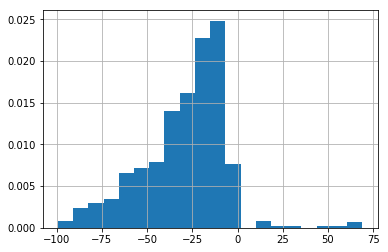

In [41]:
import matplotlib.pyplot as plt
# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()